论文图像中数据的代码

In [1]:
import sys
sys.path.append('d:/code/pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

## Figure 1. 联苯扫描数据

In [6]:
from pywfn.bondprop import order
root=f'paper/mols/Fig1.scan'
bonds=[(2,3),(3,10),(10,11),(10,12)]
orders=np.zeros(shape=(37,3,4))
orders[:,0,:]=np.loadtxt('paper/npys/piOrderSMO.txt')
for i in range(37):
    path=f'{root}/f{i+1:0>2}.log'
    print(path)
    mol=Mol(LogReader(f'{path}'))
    caler=order.Calculator(mol)
    # 轨道挑选法
    # print(f"{'pi bond order (SMO)':-^40}")
    # for b,(a1,a2) in enumerate(bonds): # spepd is too slowly
    #     result=caler.pi_smo([a1,a2])
    #     orders[i,0,b]=result
    #     print(a1,a2,result)
    
    
    for b,(a1,a2) in enumerate(bonds):
        val=orders[i,0,b]
        print(a1,a2,val)
    # pocv方法计算pi键键级
    print(f"{'pi bond order (POCV)':-^40}")
    result=caler.pi_pocv()
    index=0
    for a1,a2,val in result:
        a1,a2=int(a1),int(a2)
        if (a1,a2) not in bonds:continue
        print(a1,a2,val)
        orders[i,1,index]=val
        index+=1
    # mayer键键级
    print(f"{'mayer bond order':-^40}")
    result=caler.mayer()
    index=0
    for a1,a2,val in result:
        a1,a2=int(a1),int(a2)
        if (a1,a2) not in bonds:continue
        print(a1,a2,val)
        orders[i,2,index]=val
        index+=1

paper/mols/Fig1.scan/f01.log
2 3 0.3021976542711145
3 10 -0.0012792373488533545
10 11 0.010256813449021096
10 12 0.5277353410390788
----------pi bond order (POCV)----------
2 3 0.6005034844480505
3 10 0.2801345947505875
10 11 0.28933464542092213
10 12 0.8329867390786102
------------mayer bond order------------
2 3 1.320220020922675
3 10 1.0033400288716843
10 11 0.9785938981006439
10 12 1.621601369846873
paper/mols/Fig1.scan/f02.log
2 3 0.3090981516735793
3 10 -0.001185943412257744
10 11 0.009767607992057649
10 12 0.5061436278540601
----------pi bond order (POCV)----------
2 3 0.5942468060945731
3 10 0.3111182792097911
10 11 0.28737506396498175
10 12 0.8222659928879344
------------mayer bond order------------
2 3 1.3099557974219325
3 10 1.0242715696174547
10 11 0.9797318234233605
10 12 1.6000880107197695
paper/mols/Fig1.scan/f03.log
2 3 0.15053749955943543
3 10 0.01074834180449731
10 11 0.010107319375671001
10 12 0.49343680916101895
----------pi bond order (POCV)----------
2 3 0.5889549

In [7]:
np.savetxt('paper/npys/piOrderPOCV.txt',orders[:,1,:])

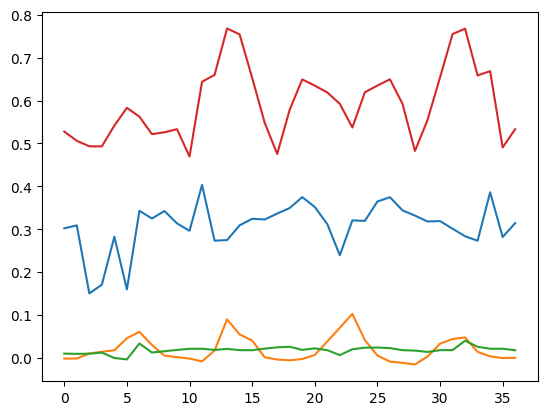

In [4]:
plt.plot(orders[:,0])

## Figure 3. $\pi$电子布局

In [ ]:
from pywfn.atomprop import charge
root='paper/mols/Fig2.piEle'
paths=[
    f'{root}/Ph2.log',
    f'{root}/CH2CHCHO.log',
    f'{root}/CO2.log',
    f'{root}/NO2.log',
    f'{root}/NNO.log',
    f'{root}/BF3.log',
]
mols=[Mol(LogReader(path)) for path in paths]

for m,mol in enumerate(mols):
    if m in [2,4]:
        mol.atom(1)._props['normal']=np.array([1.,0.,0.])
        mol.atom(2)._props['normal']=np.array([1.,0.,0.])
        mol.atom(3)._props['normal']=np.array([1.,0.,0.])
    caler=charge.Calculator(mol)
    elects=caler.piElectron('mulliken')
    print(f'{mol.reader.path}')
    print(elects)